# **Sentiment Analysis to Assess the Effect of Employee Satisfaction on the Company's Stock**

The Glass Door website presents an opportunity to write anonymous employee reviews about their workplace, which can be analyzed to classify them as positive or negative. Through this process, it is possible to derive an average rating of the employees' experience during a specific period of time. <br>
Based on the assumption that employee satisfaction is positively correlated with productivity, it is hypothesized that a positive work environment will lead to increased productivity and improved performance. Consequently, the company's products will receive more favorable reviews, potentially leading to a corresponding increase in the value of the company's stock.

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from textblob import TextBlob
import matplotlib.pyplot as plt


## **Import and Cleaning Data**

In [2]:
drive.mount("/content/gdrive/")
reviews_df = pd.read_csv("/content/gdrive/MyDrive/NLPFinalProject/glassdoor_reviews.csv")
reviews_df = reviews_df[['firm', 'date_review', 'current', 'pros', 'cons']]

AAPL_df = pd.read_csv("/content/gdrive/MyDrive/NLPFinalProject/AAPL.csv")
C_df = pd.read_csv("/content/gdrive/MyDrive/NLPFinalProject/C.csv")
GOOG_df = pd.read_csv("/content/gdrive/MyDrive/NLPFinalProject/GOOG.csv")
IBM_df = pd.read_csv("/content/gdrive/MyDrive/NLPFinalProject/IBM.csv")
JPM_df = pd.read_csv("/content/gdrive/MyDrive/NLPFinalProject/JPM.csv")
MCD_df = pd.read_csv("/content/gdrive/MyDrive/NLPFinalProject/MCD.csv")
MSFT_df = pd.read_csv("/content/gdrive/MyDrive/NLPFinalProject/MSFT.csv")
ORCL_df = pd.read_csv("/content/gdrive/MyDrive/NLPFinalProject/ORCL.csv")
SAP_df = pd.read_csv("/content/gdrive/MyDrive/NLPFinalProject/SAP.csv")

stock_dfs = [AAPL_df, C_df, GOOG_df, IBM_df, JPM_df, MCD_df, MSFT_df, ORCL_df, SAP_df]
names = ["AAPL", "C", "GOOG", "IBM", "JPM", "MCD", "MSFT", "ORCL", "SAP"]

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
#converts date to pandas datetime
for df in stock_dfs:
  df['Date'] = pd.to_datetime(df['Date'])

#check that the stocks data is from the desired dates
for df, name in zip(stock_dfs, names):
  min_date = df['Date'].min()
  max_date = df['Date'].max()
  print('Date Range of ' + name + ': ', min_date, 'to', max_date)

Date Range of AAPL:  2015-01-02 00:00:00 to 2019-12-30 00:00:00
Date Range of C:  2015-01-02 00:00:00 to 2019-12-30 00:00:00
Date Range of GOOG:  2015-01-02 00:00:00 to 2019-12-30 00:00:00
Date Range of IBM:  2015-01-02 00:00:00 to 2019-12-30 00:00:00
Date Range of JPM:  2015-01-02 00:00:00 to 2019-12-30 00:00:00
Date Range of MCD:  2015-01-02 00:00:00 to 2019-12-30 00:00:00
Date Range of MSFT:  2015-01-02 00:00:00 to 2019-12-30 00:00:00
Date Range of ORCL:  2015-01-02 00:00:00 to 2019-12-30 00:00:00
Date Range of SAP:  2015-01-02 00:00:00 to 2019-12-30 00:00:00


In [4]:
#save reviews from Jan 2015 to Dec 2019
reviews_df['date_review'] = pd.to_datetime(reviews_df['date_review'])
reviews_df = reviews_df.query("date_review.dt.year >= 2015 and date_review.dt.year <= 2019")

#save reviews of current employees
reviews_df = reviews_df.query("current.str.contains('Current')")

#save the 9 companies with largest number of reviews 
firm_l = reviews_df.firm.to_list()
d = {}
for firm in set(firm_l):
  d[firm] = firm_l.count(firm)
most_common = list(dict(sorted(d.items(), key=lambda x:x[1])).keys())[-13:]
comp_to_remove = ("Deloitte", "EY", "PwC", "KPMG") #no finance data in Yahoo
for comp in comp_to_remove:
  most_common.remove(comp)
reviews_df = reviews_df.query("firm in @most_common")

## **Sentiment Analysis**

In [5]:
def sentiment_analysis(reviews_df):
  #get the polarity score of text as a value from 0 to 1 
  def getPolarity(text):
    return (TextBlob(str(text)).sentiment.polarity + 1) / 2
  
  #returns the average of polarity score of the pros and the ploarity score of the cons
  def getAnalysis(score_pros, score_cons):
    return (score_pros + score_cons) / 2

  #add a polarities columns to reviews data set
  reviews_df['pros_pol'] = reviews_df['pros'].apply(getPolarity)
  reviews_df['cons_pol'] = reviews_df['cons'].apply(getPolarity)
  
  #add an analysis score column to reviews data set
  reviews_df['TextBlob_Analysis'] = reviews_df.apply(lambda row: getAnalysis(row['pros_pol'], row['cons_pol']), axis=1)
  return reviews_df

In [6]:
sentiment_analysis(reviews_df)
reviews_df.head()

,firm,date_review,current,pros,cons,pros_pol,cons_pol,TextBlob_Analysis
31918,Apple,2015-01-01,Current Employee,Additional hours are well paid,Growing opportunities are low or null,0.500000,0.500000,0.500000
31919,Apple,2015-01-01,"Current Employee, more than 1 year",The thing that I like best is the people I wor...,I have worked a lot of retail and I can't say ...,0.833333,0.406250,0.619792
31920,Apple,2015-01-01,"Current Employee, more than 3 years",The prestige of the job attracts attention to ...,There will be hard work everyday ahead of you....,0.850000,0.473611,0.661806
31922,Apple,2015-01-02,"Current Employee, more than 1 year",Every day throws something new at you and ther...,Customer Service or trick predicaments when te...,0.501894,0.400000,0.450947
31924,Apple,2015-01-02,"Current Employee, more than 5 years",Great place to work.. Fun place,"If you are in the wrong job, you are doomed.",0.775000,0.250000,0.512500


## **Data Aggregation**

In [7]:
#creating new data frames from reviews_df, based on the company name
AAPL_rev = reviews_df[reviews_df['firm'] == 'Apple'][['date_review', 'TextBlob_Analysis']]
C_rev = reviews_df[reviews_df['firm'] == 'Citi'][['date_review', 'TextBlob_Analysis']]
GOOG_rev = reviews_df[reviews_df['firm'] == 'Google'][['date_review', 'TextBlob_Analysis']]
IBM_rev = reviews_df[reviews_df['firm'] == 'IBM'][['date_review', 'TextBlob_Analysis']]
JPM_rev = reviews_df[reviews_df['firm'] == 'J-P-Morgan'][['date_review', 'TextBlob_Analysis']]
MCD_rev = reviews_df[reviews_df['firm'] == 'McDonald-s'][['date_review', 'TextBlob_Analysis']]
MSFT_rev = reviews_df[reviews_df['firm'] == 'Microsoft'][['date_review', 'TextBlob_Analysis']]
ORCL_rev = reviews_df[reviews_df['firm'] == 'Oracle'][['date_review', 'TextBlob_Analysis']]
SAP_rev = reviews_df[reviews_df['firm'] == 'SAP'][['date_review', 'TextBlob_Analysis']]

In [8]:
#takes the average score if there are more than one reviews in one date
AAPL_rev = AAPL_rev.groupby('date_review').mean().reset_index()
C_rev = C_rev.groupby('date_review').mean().reset_index()
GOOG_rev = GOOG_rev.groupby('date_review').mean().reset_index()
IBM_rev = IBM_rev.groupby('date_review').mean().reset_index()
JPM_rev = JPM_rev.groupby('date_review').mean().reset_index()
MCD_rev = MCD_rev.groupby('date_review').mean().reset_index()
MSFT_rev = MSFT_rev.groupby('date_review').mean().reset_index()
ORCL_rev = ORCL_rev.groupby('date_review').mean().reset_index()
SAP_rev = SAP_rev.groupby('date_review').mean().reset_index()

In [9]:
#merging the stocks data and sentiment scores in the same dataframe for each company
AAPL_mer = pd.merge(AAPL_df, AAPL_rev, left_on='Date', right_on='date_review', how='left')
C_mer = pd.merge(C_df, C_rev, left_on='Date', right_on='date_review', how='left')
GOOG_mer = pd.merge(GOOG_df, GOOG_rev, left_on='Date', right_on='date_review', how='left')
IBM_mer = pd.merge(IBM_df, IBM_rev, left_on='Date', right_on='date_review', how='left')
JPM_mer = pd.merge(JPM_df, JPM_rev, left_on='Date', right_on='date_review', how='left')
MCD_mer = pd.merge(MCD_df, MCD_rev, left_on='Date', right_on='date_review', how='left')
MSFT_mer = pd.merge(MSFT_df, MSFT_rev, left_on='Date', right_on='date_review', how='left')
ORCL_mer = pd.merge(ORCL_df, ORCL_rev, left_on='Date', right_on='date_review', how='left')
SAP_mer = pd.merge(SAP_df, SAP_rev, left_on='Date', right_on='date_review', how='left')

In [10]:
def count_Nan(df, name):
  nan_count = df['TextBlob_Analysis'].isna().sum()
  print("Number of NaN values in " +name+ ": " + str(nan_count))

def fillNanValues(df):
  df["TextBlob_Analysis"] = df["TextBlob_Analysis"].fillna(df["TextBlob_Analysis"].rolling(7, min_periods=1).mean())
  return df

In [11]:
#counting the Nan values in the merged df - how many days doesnt have reviews but do have stock data
df_l = [AAPL_mer, C_mer, GOOG_mer, IBM_mer, JPM_mer, MCD_mer, MSFT_mer, ORCL_mer, SAP_mer]
for df,name in zip(df_l, names):
  count_Nan(df,name)

Number of NaN values in AAPL: 42
Number of NaN values in C: 67
Number of NaN values in GOOG: 144
Number of NaN values in IBM: 3
Number of NaN values in JPM: 38
Number of NaN values in MCD: 18
Number of NaN values in MSFT: 28
Number of NaN values in ORCL: 13
Number of NaN values in SAP: 111


In [12]:
#filling those Nan scores values with the mean score of 7 days before
for df in df_l:
  df = fillNanValues(df)

#check that there are no more Nan values (if there is, its in the first row, so I dropped it)
for df,name in zip(df_l, names):
  count_Nan(df,name)

Number of NaN values in AAPL: 0
Number of NaN values in C: 0
Number of NaN values in GOOG: 0
Number of NaN values in IBM: 0
Number of NaN values in JPM: 1
Number of NaN values in MCD: 0
Number of NaN values in MSFT: 0
Number of NaN values in ORCL: 0
Number of NaN values in SAP: 1


In [13]:
SAP_mer.drop(0, inplace=True)
JPM_mer.drop(0, inplace=True)

In [14]:
#remove the column of the date of review
for df in df_l:
  df.drop('date_review', axis=1, inplace=True)

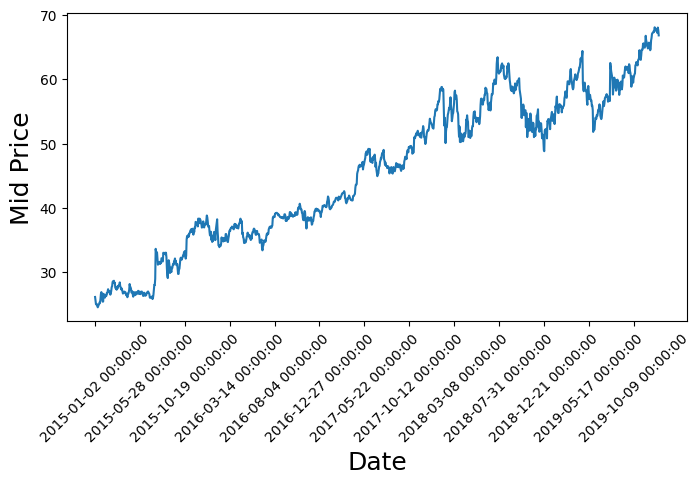

,Date,Open,High,Low,Close,Adj Close,Volume,TextBlob_Analysis
1,2015-01-05,68.300003,68.360001,67.059998,67.199997,58.790165,1678800,0.669583
2,2015-01-06,65.930000,66.459999,65.360001,65.680000,57.460384,1478900,0.528667
3,2015-01-07,64.980003,65.459999,64.599998,65.089996,56.944218,1483100,0.599125
4,2015-01-08,64.510002,66.309998,64.500000,66.129997,57.854069,1184700,0.639028
5,2015-01-09,65.230003,65.269997,64.419998,65.029999,56.891735,1142500,0.628125


In [15]:
#ploting the stock data of a company
plt.figure(figsize = (8,4))
plt.plot(range(GOOG_mer.shape[0]),(GOOG_mer['Close']))
plt.xticks(range(0,GOOG_mer.shape[0],100),GOOG_mer['Date'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

#for summary, the final data set of each company is:
SAP_mer.head()

## **LSTM Model - PreProcessing and Architecture**

In [16]:
from pandas import concat

import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [17]:
#splitting the data to train and test according to the year:
# train set - first 4 years
# test set - last year

df_ = {}
df_new = {}
#creating a dict of the data sets
for df,name in zip(df_l, names):
  df_[name] = df
for name in names:
  df_new[name] = {}
  df_new[name]['Train'] = df_[name].query("Date.dt.year < 2019")
  df_new[name]['Test'] = df_[name].query("Date.dt.year >= 2019")

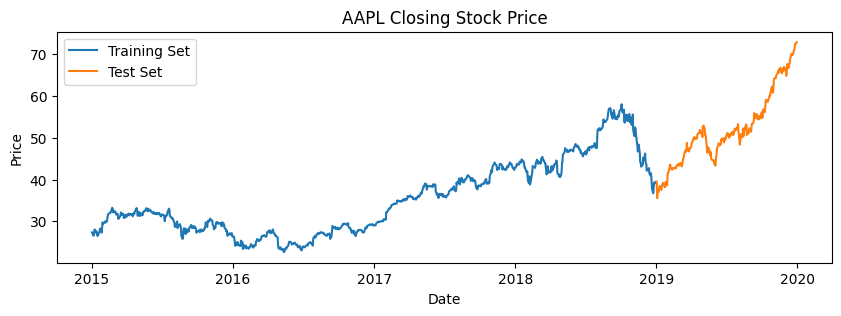

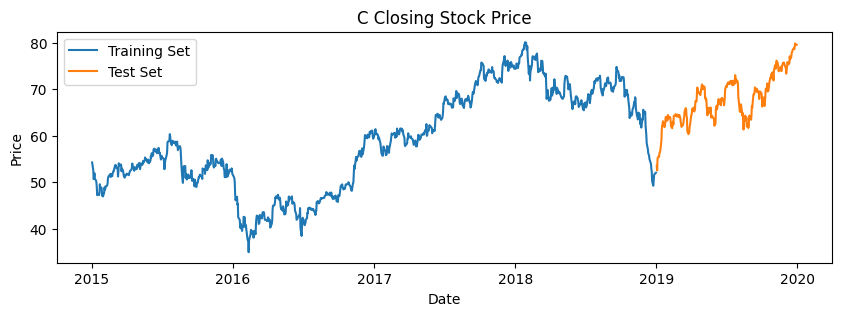

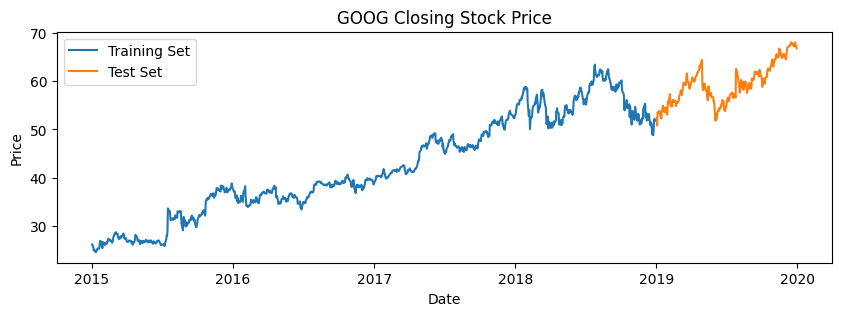

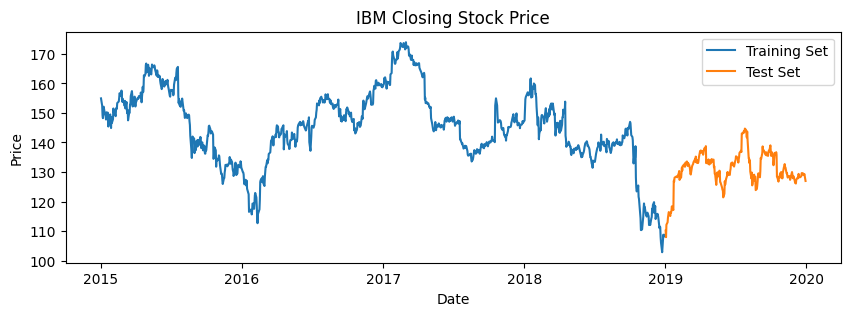

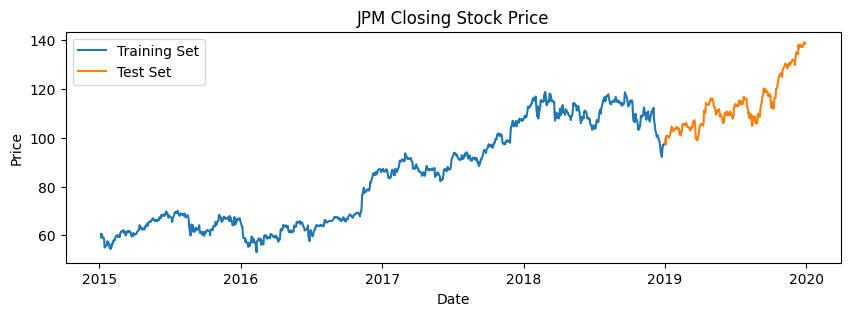

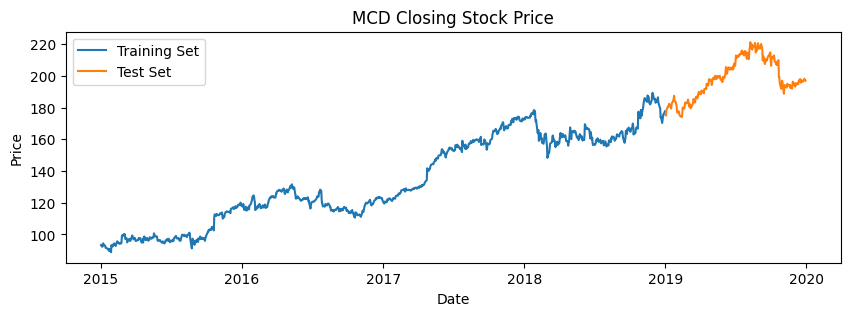

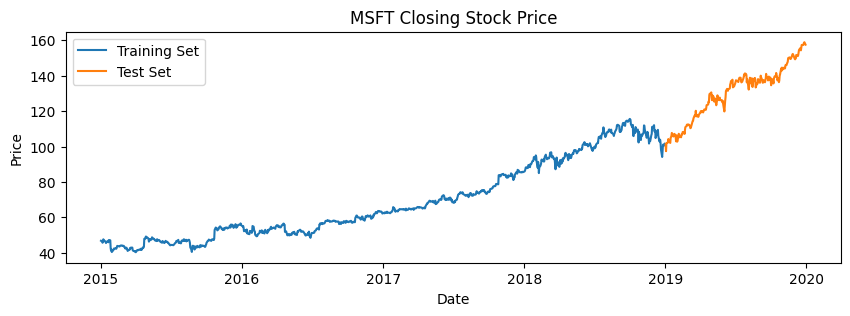

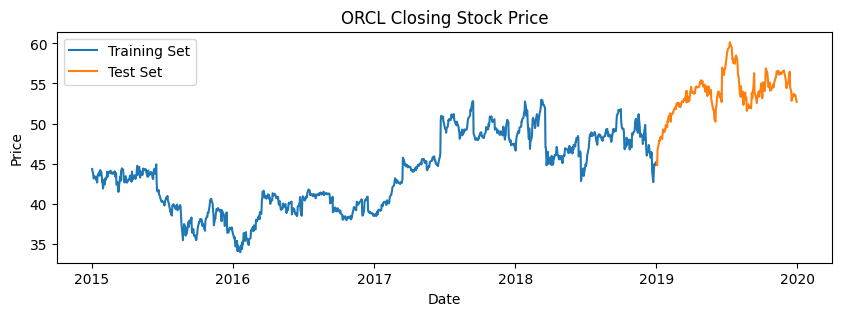

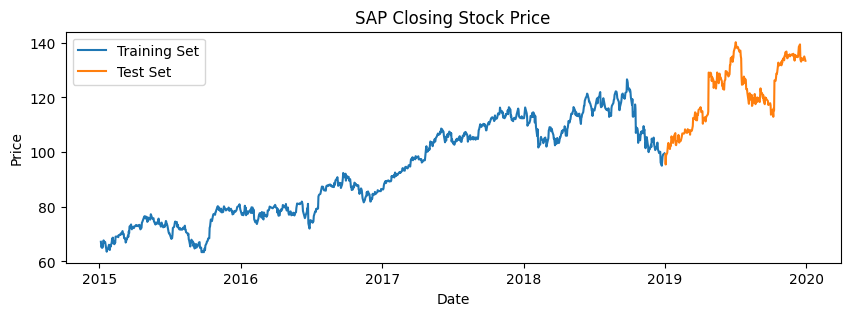

In [18]:
for name in names:
  plt.figure(figsize=(10,3))
  plt.plot(df_new[name]['Train']['Date'],df_new[name]['Train']['Close'])
  plt.plot(df_new[name]['Test']['Date'],df_new[name]['Test']['Close'])
  plt.ylabel("Price")
  plt.xlabel("Date")
  plt.legend(["Training Set", "Test Set"])
  plt.title(name + " Closing Stock Price")


In [19]:
#preprocessing - scaling the stock prices and sentiment analysis columns in all data sets:
# 0 will be the lowest price/score
# 1 will be the highest price/score

transform_train = {}
transform_test = {}
transform_train_y = {}
transform_test_y = {}
scaler = {}
scalery = {}

for name in names:
  scX = MinMaxScaler(feature_range=(0,1))
  a0 = np.array(df_new[name]["Train"].drop('Date', axis=1))
  a1 = np.array(df_new[name]["Test"].drop('Date', axis=1))
  a0 = a0.reshape(a0.shape[0],7)
  a1 = a1.reshape(a1.shape[0],7)
  transform_train[name] = scX.fit_transform(a0)
  transform_test[name] = scX.transform(a1)
  scaler[name] = scX
  
  scY = MinMaxScaler(feature_range=(0,1))
  y0 = np.array(df_new[name]["Train"]["Close"])
  y1 = np.array(df_new[name]["Test"]["Close"])
  transform_train_y[name] = scY.fit_transform(y0.reshape(-1, 1))
  transform_test_y[name] = scY.transform(y1.reshape(-1, 1))
  scalery[name] = scY

del a0
del a1

In [20]:
for i in transform_train.keys():
  print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
  print(i, transform_test[i].shape)

AAPL (1006, 7)
C (1006, 7)
GOOG (1006, 7)
IBM (1006, 7)
JPM (1005, 7)
MCD (1006, 7)
MSFT (1006, 7)
ORCL (1006, 7)
SAP (1005, 7)


AAPL (251, 7)
C (251, 7)
GOOG (251, 7)
IBM (251, 7)
JPM (251, 7)
MCD (251, 7)
MSFT (251, 7)
ORCL (251, 7)
SAP (251, 7)


In [21]:
#preparing shape of train and test sets for the neural network input with 30 features
trainset = {}
testset = {}
for j in names:
  trainset[j] = {}
  X_train = []
  y_train = []
  for i in range(30,1005):
    X_train.append(transform_train[j][i-30:i,:])
    y_train.append(transform_train_y[j][i,0])
  X_train, y_train = np.array(X_train), np.array(y_train)
  trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],7))
  trainset[j]["y"] = y_train
  
  testset[j] = {}
  X_test = []
  y_test = []    
  for i in range(30,251):
    X_test.append(transform_test[j][i-30:i,:])
    y_test.append(transform_test_y[j][i,0])
  X_test, y_test = np.array(X_test), np.array(y_test)
  testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],7))
  testset[j]["y"] = y_test

In [22]:
#displaying train and test sets sizes
arr_buff = []
for i in names:
  buff = {}
  buff["X_train"] = trainset[i]["X"].shape
  buff["y_train"] = trainset[i]["y"].shape
  buff["X_test"] = testset[i]["X"].shape
  buff["y_test"] = testset[i]["y"].shape
  arr_buff.append(buff)

pd.DataFrame(arr_buff, index=names)

,X_train,y_train,X_test,y_test
AAPL,"(975, 30, 7)","(975,)","(221, 30, 7)","(221,)"
C,"(975, 30, 7)","(975,)","(221, 30, 7)","(221,)"
GOOG,"(975, 30, 7)","(975,)","(221, 30, 7)","(221,)"
IBM,"(975, 30, 7)","(975,)","(221, 30, 7)","(221,)"
JPM,"(975, 30, 7)","(975,)","(221, 30, 7)","(221,)"
MCD,"(975, 30, 7)","(975,)","(221, 30, 7)","(221,)"
MSFT,"(975, 30, 7)","(975,)","(221, 30, 7)","(221,)"
ORCL,"(975, 30, 7)","(975,)","(221, 30, 7)","(221,)"
SAP,"(975, 30, 7)","(975,)","(221, 30, 7)","(221,)"


In [23]:
#LSTM architecture
model = Sequential()
# first LSTM layer with Dropout regularisation
model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1],7)))
model.add(Dropout(0.08))
# second LSTM layer
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.05))
# third LSTM layer
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.01))
# output layer
model.add(Dense(units=1))

#compiling 
model.compile(optimizer=Adam(), loss='mean_squared_error')
# fitting to train set
for name in names:
  print("Fitting to", name)
  model.fit(trainset[name]["X"], trainset[name]["y"], epochs=6, batch_size=55)

Fitting to AAPL
Epoch 1/6
18/18 [==============================] - 5s 38ms/step - loss: 0.0248
Epoch 2/6
18/18 [==============================] - 1s 39ms/step - loss: 0.0036
Epoch 3/6
18/18 [==============================] - 1s 37ms/step - loss: 0.0030
Epoch 4/6
18/18 [==============================] - 1s 38ms/step - loss: 0.0025
Epoch 5/6
18/18 [==============================] - 1s 39ms/step - loss: 0.0022
Epoch 6/6
18/18 [==============================] - 1s 59ms/step - loss: 0.0022
Fitting to C
Epoch 1/6
18/18 [==============================] - 1s 59ms/step - loss: 0.0030
Epoch 2/6
18/18 [==============================] - 1s 48ms/step - loss: 0.0031
Epoch 3/6
18/18 [==============================] - 1s 37ms/step - loss: 0.0028
Epoch 4/6
18/18 [==============================] - 1s 38ms/step - loss: 0.0026
Epoch 5/6
18/18 [==============================] - 1s 39ms/step - loss: 0.0025
Epoch 6/6
18/18 [==============================] - 1s 38ms/step - loss: 0.0024
Fitting to GOOG
Epoch 1

7/7 [==============================] - 0s 10ms/step


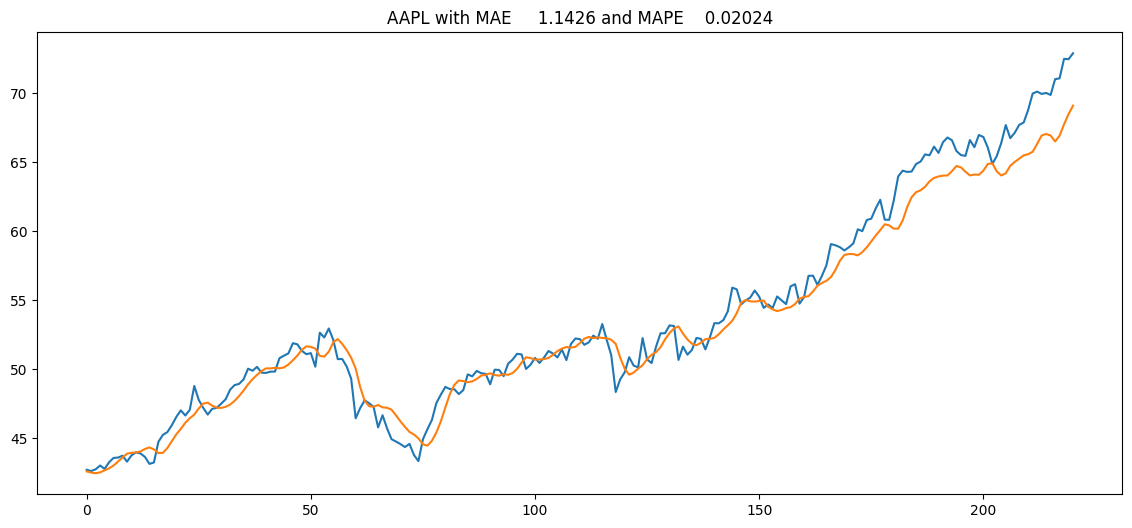

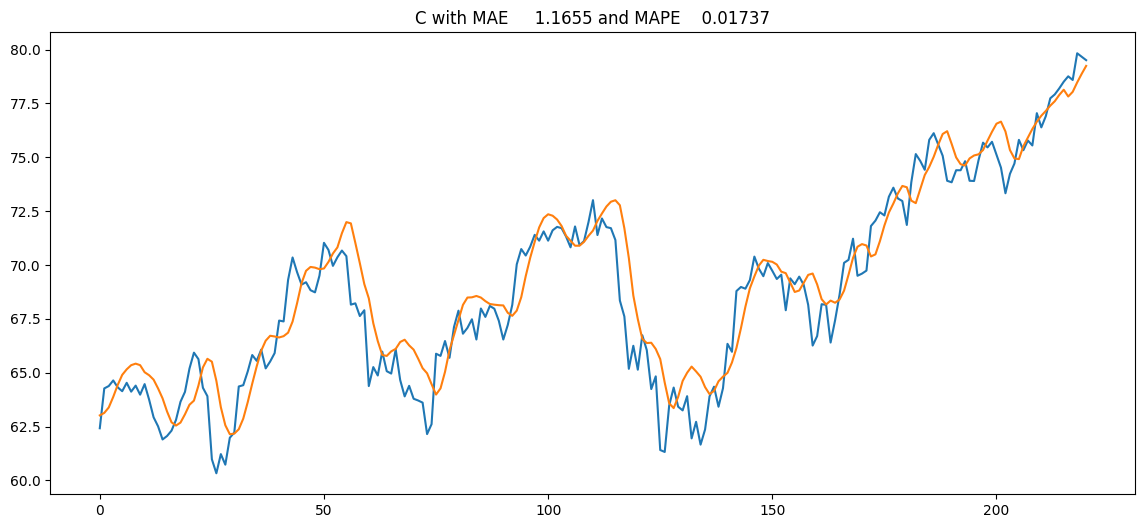

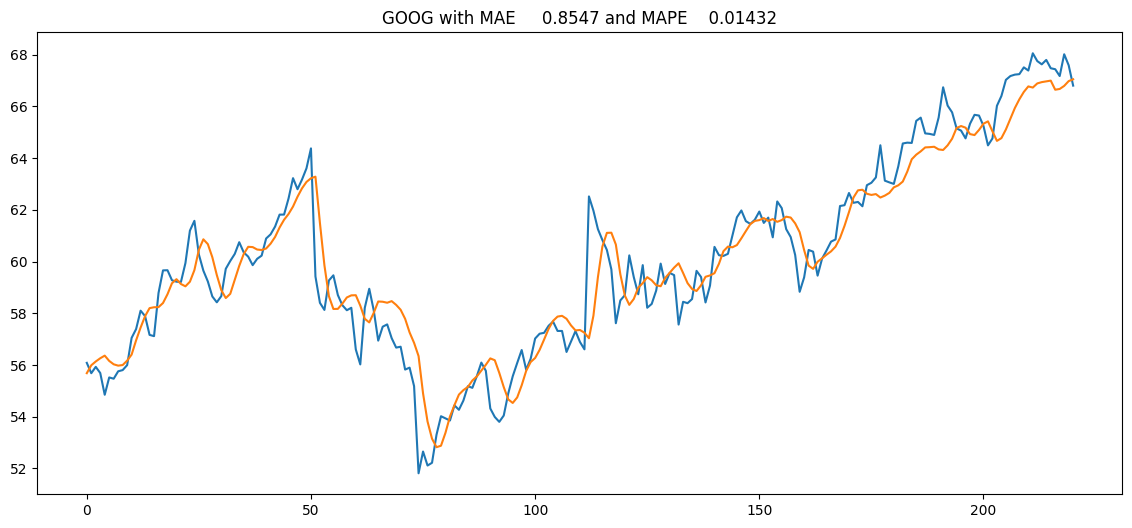

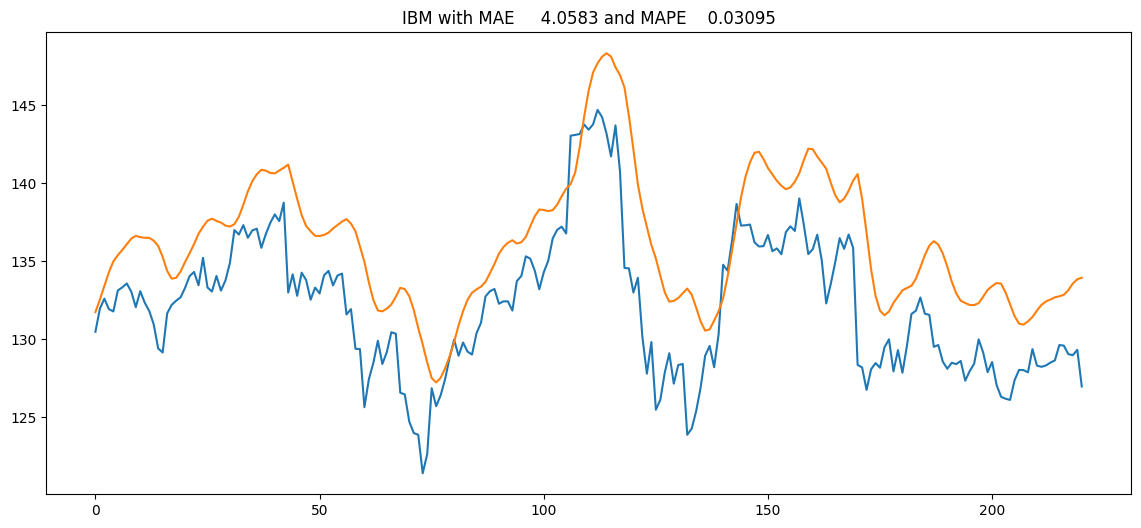

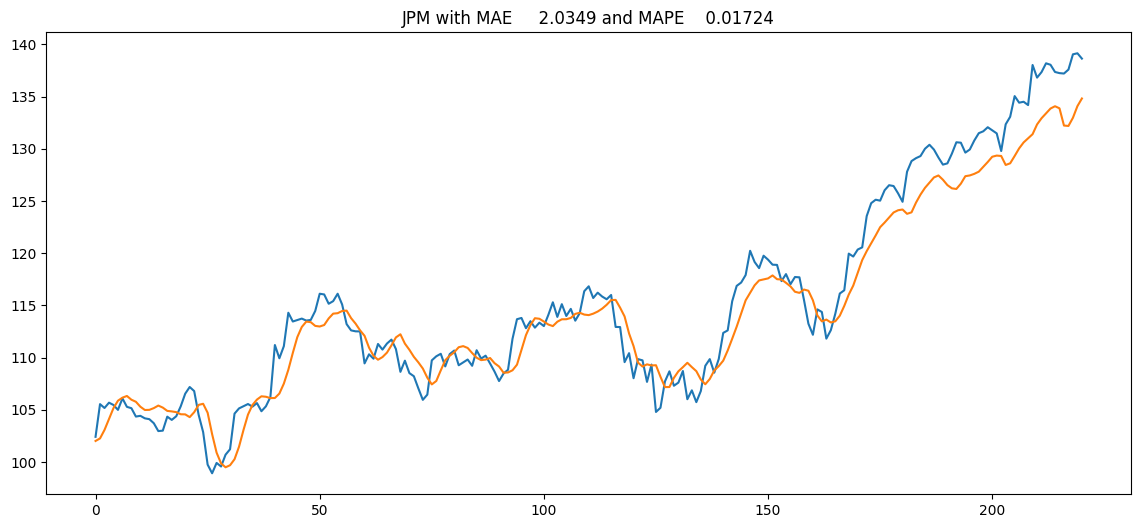

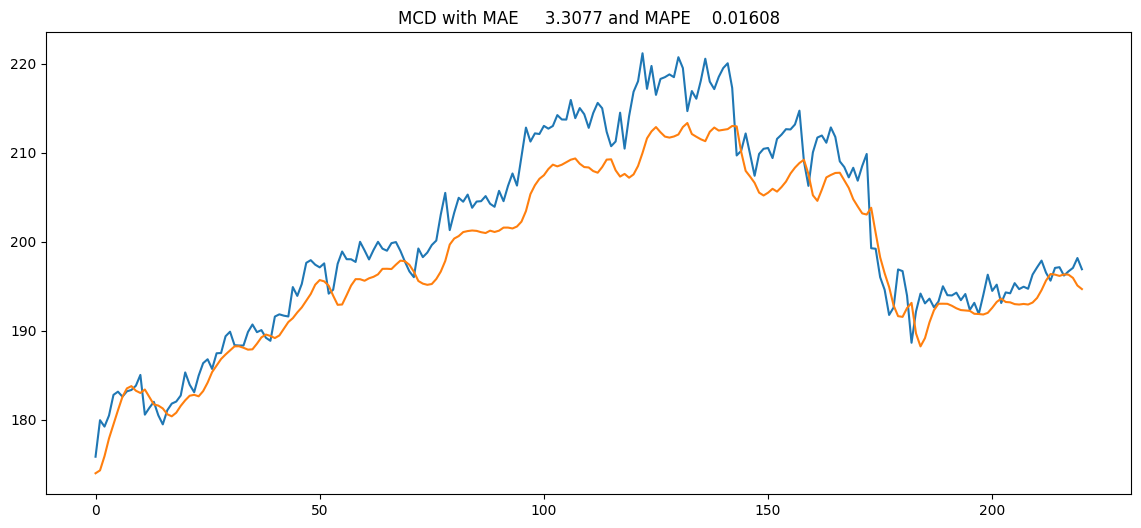

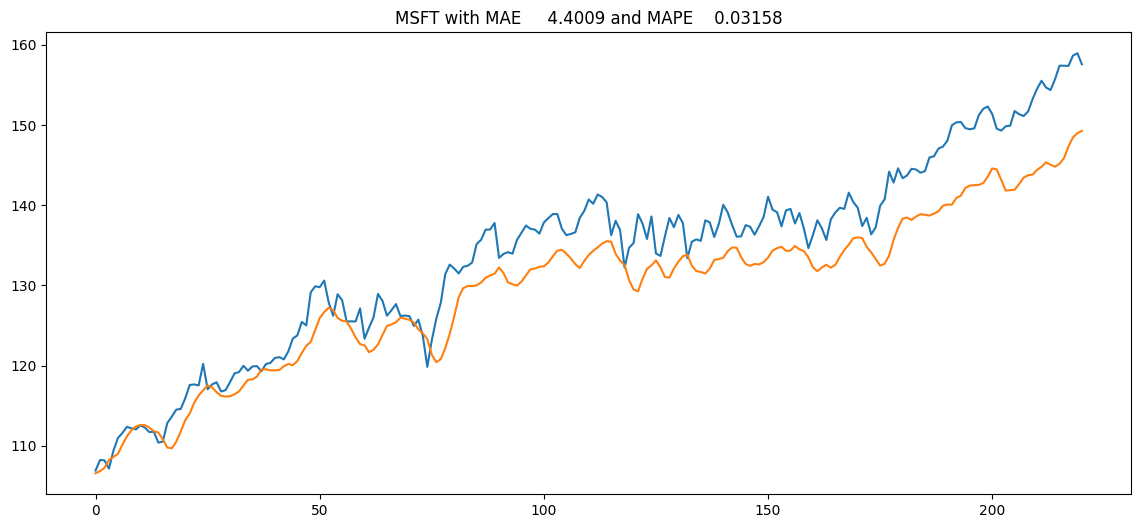

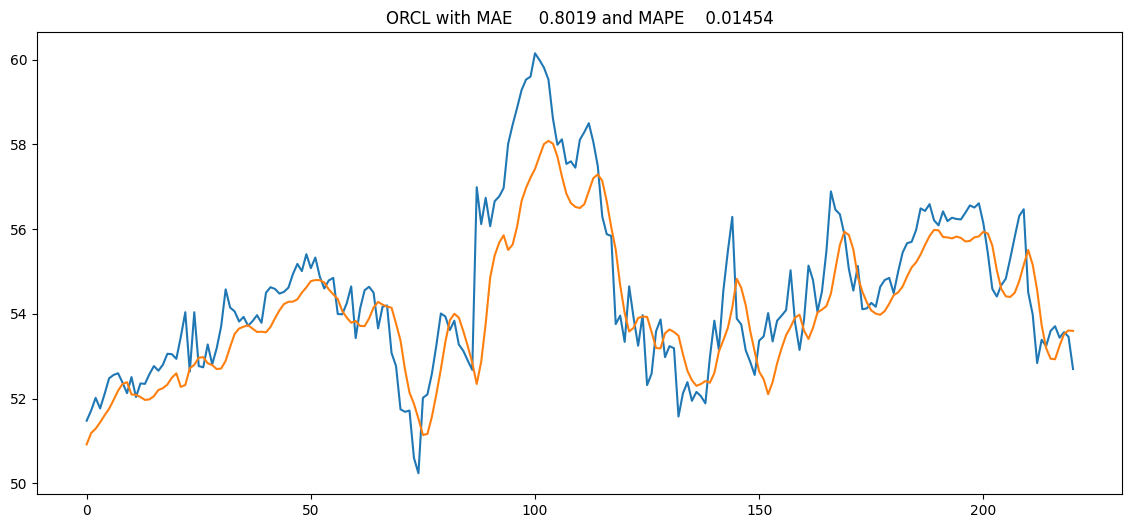

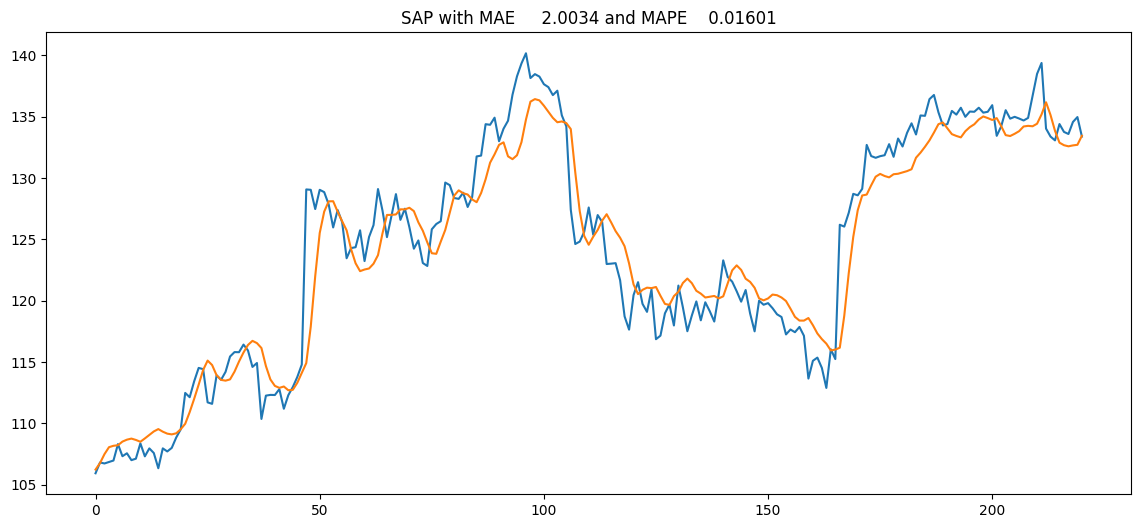

In [24]:
pred_result = {}
MAE = {}
MAPE = {}
for name in names:
  y_true = scalery[name].inverse_transform(testset[name]["y"].reshape(-1,1))
  y_pred = scalery[name].inverse_transform(model.predict(testset[name]["X"]))
  MAE[name] = mean_absolute_error(y_true, y_pred)
  MAPE[name] = mean_absolute_percentage_error(y_true, y_pred)
  pred_result[name] = {}
  pred_result[name]["True"] = y_true
  pred_result[name]["Pred"] = y_pred

  plt.figure(figsize=(14,6))
  plt.title("{} with MAE {:10.4f} and MAPE {:10.4}".format(name,MAE[name],MAPE[name]))
  plt.plot(y_true)
  plt.plot(y_pred)

In [25]:
results = pd.DataFrame({'MAE': MAE, 'MAPE': MAPE})
average_row = results.mean(axis=0)
results.loc['Average'] = average_row

display(results)

,MAE,MAPE
AAPL,1.142615,0.020240
C,1.165517,0.017368
GOOG,0.854721,0.014324
IBM,4.058309,0.030949
JPM,2.034864,0.017243
MCD,3.307653,0.016078
MSFT,4.400934,0.031577
ORCL,0.801892,0.014538
SAP,2.003409,0.016013
Average,2.196657,0.019814


## **Comparison to Stocks Prediction without Sentiment Analysis**
Using the same model with the original data sets excluding the sentiment analysis score column, to compare and check if the reviews' scores improved the prediction.

In [26]:
#splitting the data to train and test according to the year:
# train set - first 4 years
# test set - last year

df_stock_ = {}
df_stock_new = {}
#creating a dict of the data sets
for df,name in zip(df_l, names):
  df_stock_[name] = df.drop('TextBlob_Analysis', axis=1)
for name in names:
  df_stock_new[name] = {}
  df_stock_new[name]['Train'] = df_stock_[name].query("Date.dt.year < 2019")
  df_stock_new[name]['Test'] = df_stock_[name].query("Date.dt.year >= 2019")

In [27]:
#preprocessing - scaling the stock prices and sentiment analysis columns in all data sets:
# 0 will be the lowest price/score
# 1 will be the highest price/score

transform_train = {}
transform_test = {}
transform_train_y = {}
transform_test_y = {}
scaler = {}
scalery = {}

for name in names:
  scX = MinMaxScaler(feature_range=(0,1))
  a0 = np.array(df_stock_new[name]["Train"].drop('Date', axis=1))
  a1 = np.array(df_stock_new[name]["Test"].drop('Date', axis=1))
  a0 = a0.reshape(a0.shape[0],6)
  a1 = a1.reshape(a1.shape[0],6)
  transform_train[name] = scX.fit_transform(a0)
  transform_test[name] = scX.transform(a1)
  scaler[name] = scX
  
  scY = MinMaxScaler(feature_range=(0,1))
  y0 = np.array(df_stock_new[name]["Train"]["Close"])
  y1 = np.array(df_stock_new[name]["Test"]["Close"])
  transform_train_y[name] = scY.fit_transform(y0.reshape(-1, 1))
  transform_test_y[name] = scY.transform(y1.reshape(-1, 1))
  scalery[name] = scY

del a0
del a1

In [28]:
for i in transform_train.keys():
  print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
  print(i, transform_test[i].shape)

AAPL (1006, 6)
C (1006, 6)
GOOG (1006, 6)
IBM (1006, 6)
JPM (1005, 6)
MCD (1006, 6)
MSFT (1006, 6)
ORCL (1006, 6)
SAP (1005, 6)


AAPL (251, 6)
C (251, 6)
GOOG (251, 6)
IBM (251, 6)
JPM (251, 6)
MCD (251, 6)
MSFT (251, 6)
ORCL (251, 6)
SAP (251, 6)


In [29]:
#preparing shape of train and test sets for the neural network input with 30 features
trainset = {}
testset = {}
for j in names:
  trainset[j] = {}
  X_train = []
  y_train = []
  for i in range(30,1005):
    X_train.append(transform_train[j][i-30:i,:])
    y_train.append(transform_train_y[j][i,0])
  X_train, y_train = np.array(X_train), np.array(y_train)
  trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],6))
  trainset[j]["y"] = y_train
  
  testset[j] = {}
  X_test = []
  y_test = []    
  for i in range(30,251):
    X_test.append(transform_test[j][i-30:i,:])
    y_test.append(transform_test_y[j][i,0])
  X_test, y_test = np.array(X_test), np.array(y_test)
  testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],6))
  testset[j]["y"] = y_test

In [30]:
#displaying train and test sets sizes
arr_buff = []
for i in names:
  buff = {}
  buff["X_train"] = trainset[i]["X"].shape
  buff["y_train"] = trainset[i]["y"].shape
  buff["X_test"] = testset[i]["X"].shape
  buff["y_test"] = testset[i]["y"].shape
  arr_buff.append(buff)

pd.DataFrame(arr_buff, index=names)

,X_train,y_train,X_test,y_test
AAPL,"(975, 30, 6)","(975,)","(221, 30, 6)","(221,)"
C,"(975, 30, 6)","(975,)","(221, 30, 6)","(221,)"
GOOG,"(975, 30, 6)","(975,)","(221, 30, 6)","(221,)"
IBM,"(975, 30, 6)","(975,)","(221, 30, 6)","(221,)"
JPM,"(975, 30, 6)","(975,)","(221, 30, 6)","(221,)"
MCD,"(975, 30, 6)","(975,)","(221, 30, 6)","(221,)"
MSFT,"(975, 30, 6)","(975,)","(221, 30, 6)","(221,)"
ORCL,"(975, 30, 6)","(975,)","(221, 30, 6)","(221,)"
SAP,"(975, 30, 6)","(975,)","(221, 30, 6)","(221,)"


In [31]:
#LSTM architecture
model = Sequential()
# first LSTM layer with Dropout regularisation
model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1],6)))
model.add(Dropout(0.08))
# second LSTM layer
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.05))
# third LSTM layer
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.01))
# output layer
model.add(Dense(units=1))

#compiling 
model.compile(optimizer=Adam(), loss='mean_squared_error')
# fitting to train set
for name in names:
  print("Fitting to", name)
  model.fit(trainset[name]["X"], trainset[name]["y"], epochs=6, batch_size=55)

Fitting to AAPL
Epoch 1/6
18/18 [==============================] - 6s 59ms/step - loss: 0.0276
Epoch 2/6
18/18 [==============================] - 1s 53ms/step - loss: 0.0047
Epoch 3/6
18/18 [==============================] - 1s 41ms/step - loss: 0.0028
Epoch 4/6
18/18 [==============================] - 1s 39ms/step - loss: 0.0024
Epoch 5/6
18/18 [==============================] - 1s 40ms/step - loss: 0.0023
Epoch 6/6
18/18 [==============================] - 1s 38ms/step - loss: 0.0021
Fitting to C
Epoch 1/6
18/18 [==============================] - 1s 37ms/step - loss: 0.0031
Epoch 2/6
18/18 [==============================] - 1s 38ms/step - loss: 0.0029
Epoch 3/6
18/18 [==============================] - 1s 38ms/step - loss: 0.0027
Epoch 4/6
18/18 [==============================] - 1s 38ms/step - loss: 0.0035
Epoch 5/6
18/18 [==============================] - 1s 38ms/step - loss: 0.0032
Epoch 6/6
18/18 [==============================] - 1s 37ms/step - loss: 0.0027
Fitting to GOOG
Epoch 1

7/7 [==============================] - 0s 11ms/step


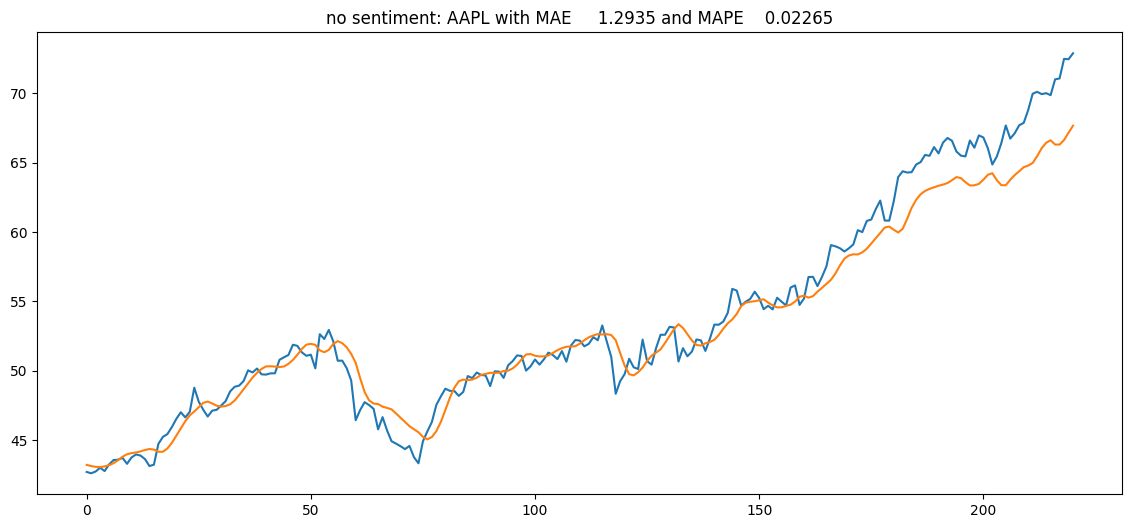

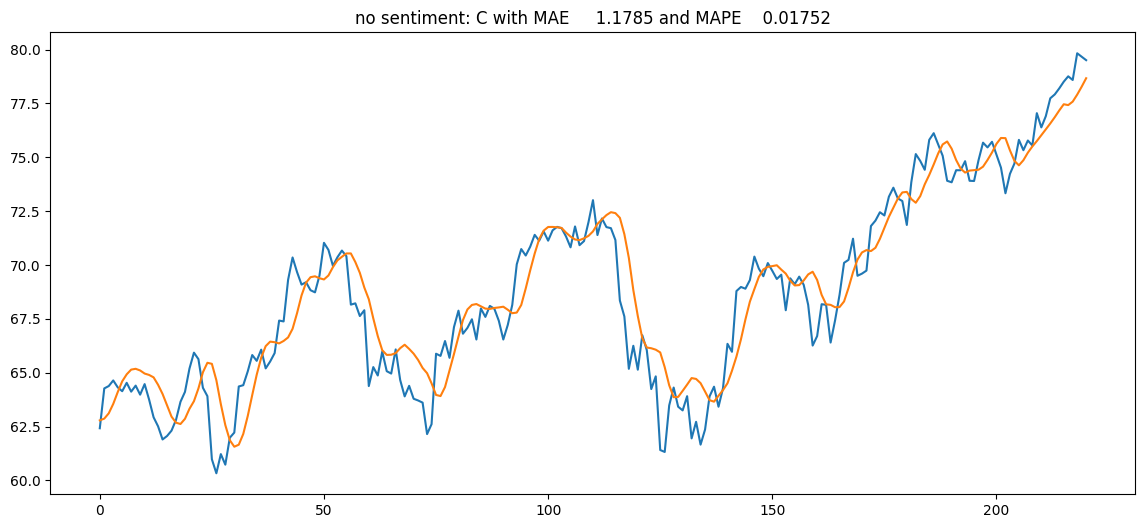

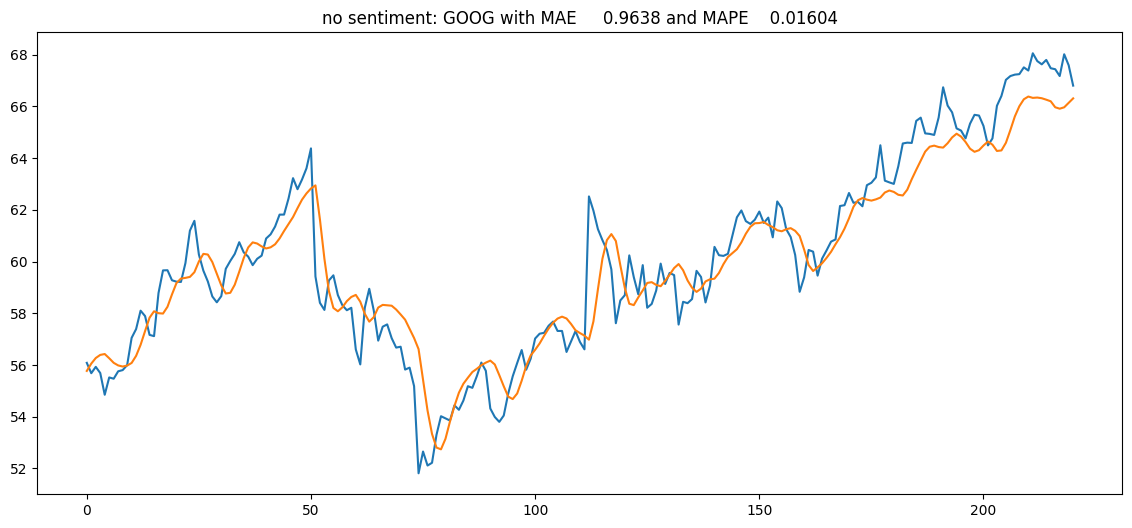

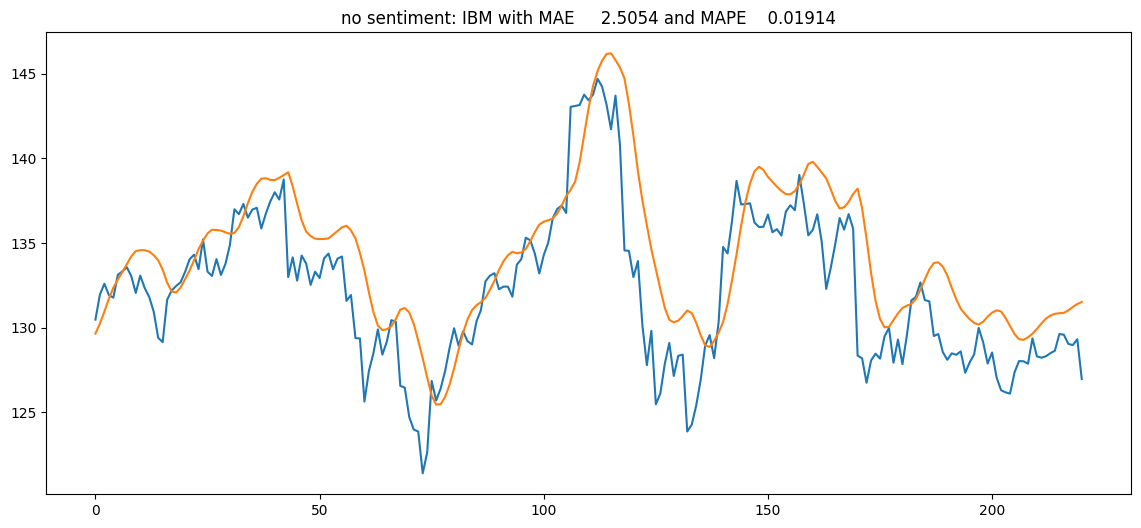

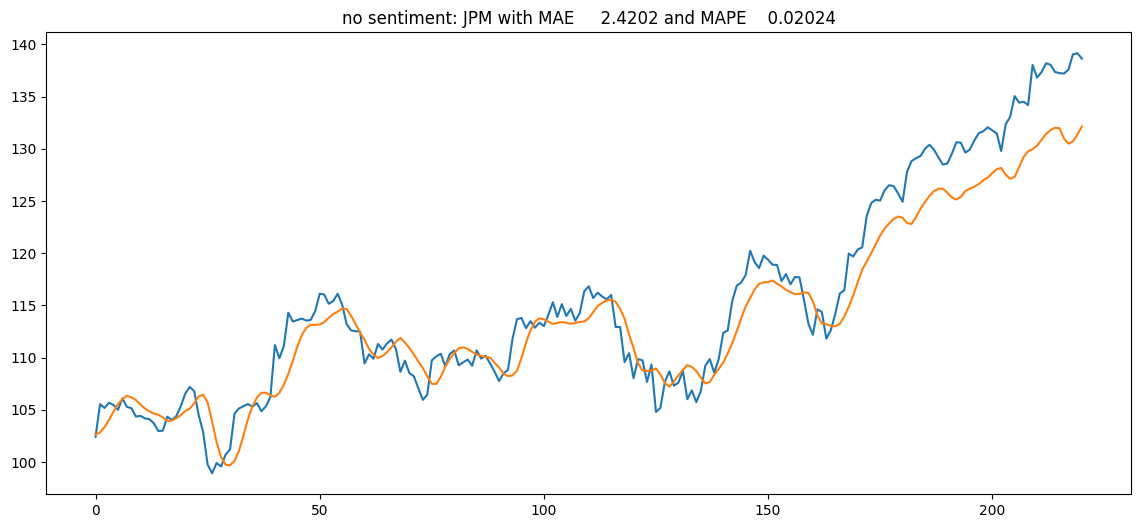

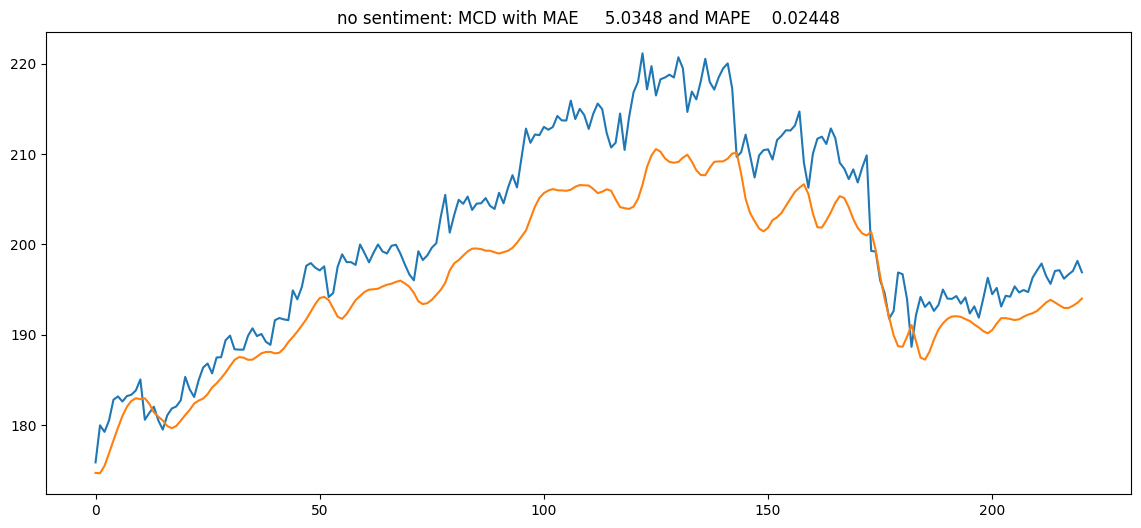

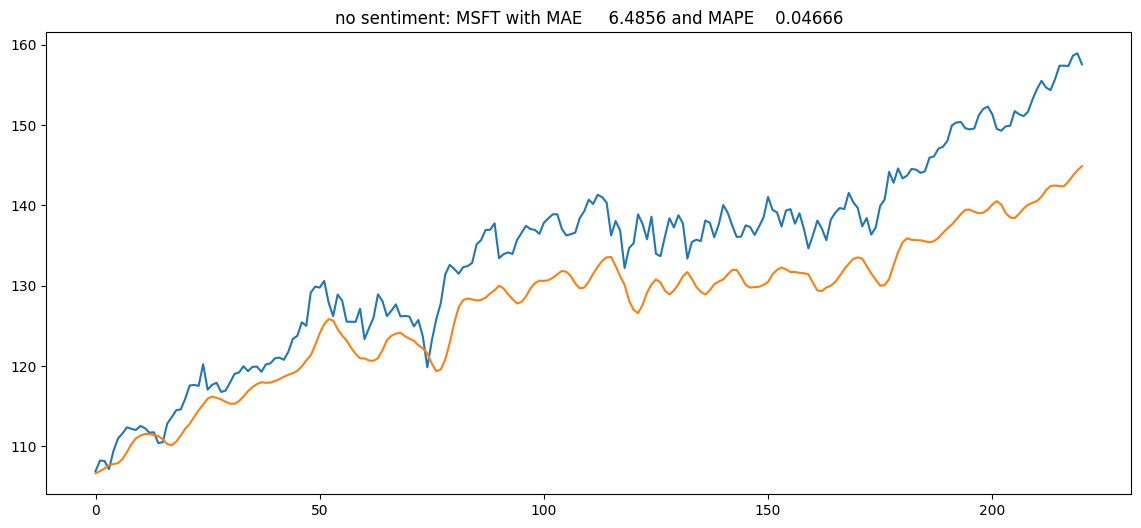

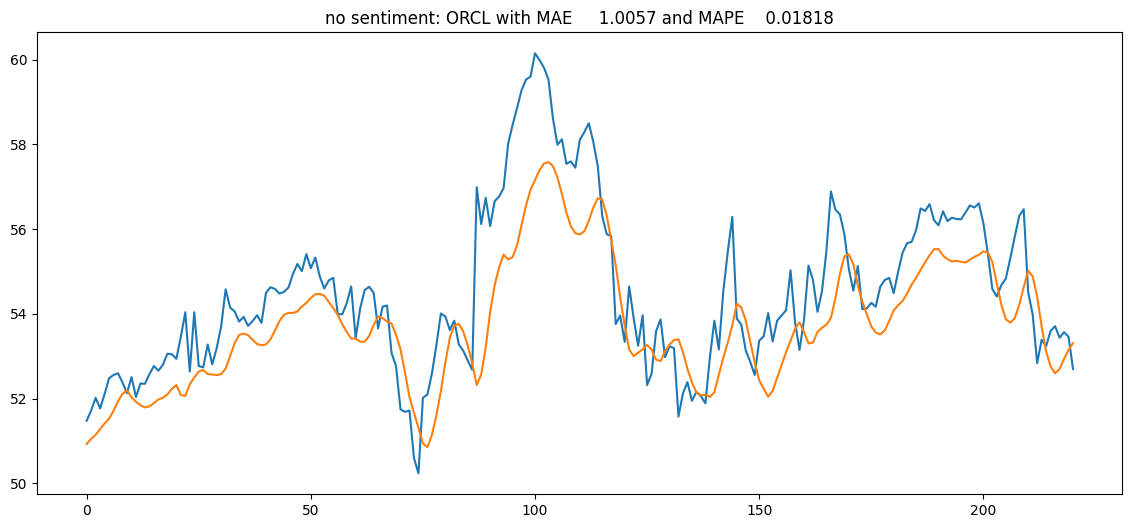

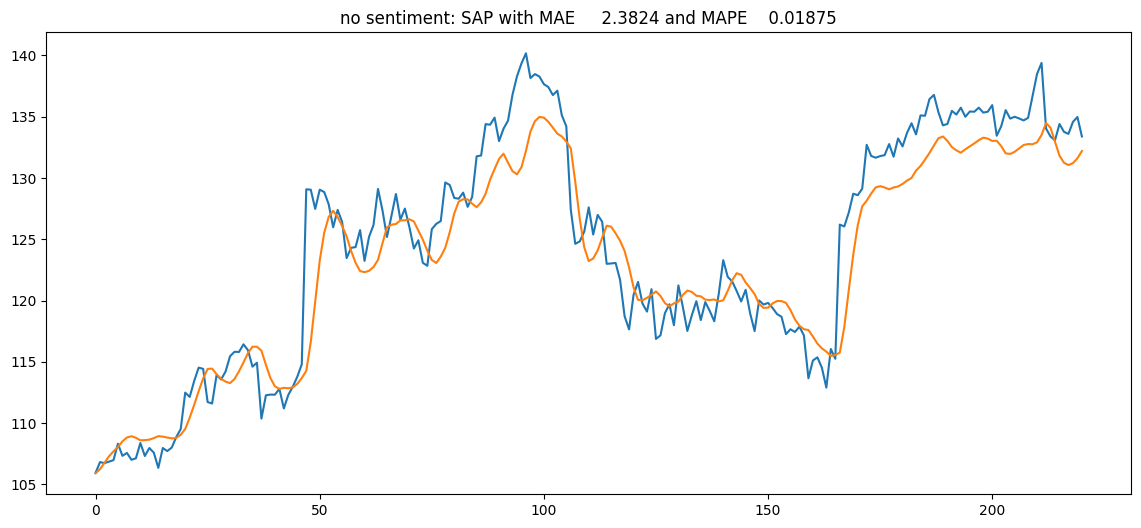

In [32]:
pred_result = {}
MAE_no_sentiment = {}
MAPE_no_sentiment = {}
for name in names:
  y_true = scalery[name].inverse_transform(testset[name]["y"].reshape(-1,1))
  y_pred = scalery[name].inverse_transform(model.predict(testset[name]["X"]))
  MAE_no_sentiment[name] = mean_absolute_error(y_true, y_pred)
  MAPE_no_sentiment[name] = mean_absolute_percentage_error(y_true, y_pred)
  pred_result[name] = {}
  pred_result[name]["True"] = y_true
  pred_result[name]["Pred"] = y_pred

  plt.figure(figsize=(14,6))
  plt.title("no sentiment: {} with MAE {:10.4f} and MAPE {:10.4}".format(name,MAE_no_sentiment[name],MAPE_no_sentiment[name]))
  plt.plot(y_true)
  plt.plot(y_pred)

In [33]:
results_no_sentiment = pd.DataFrame({'MAE no sentiment': MAE_no_sentiment, 'MAPE no sentiment': MAPE_no_sentiment})
average_row_no_sentiment = results_no_sentiment.mean(axis=0)
results_no_sentiment.loc['Average'] = average_row_no_sentiment

display(results_no_sentiment)

,MAE no sentiment,MAPE no sentiment
AAPL,1.293503,0.022648
C,1.178460,0.017520
GOOG,0.963779,0.016038
IBM,2.505354,0.019144
JPM,2.420242,0.020244
MCD,5.034764,0.024475
MSFT,6.485611,0.046658
ORCL,1.005687,0.018179
SAP,2.382367,0.018751
Average,2.585530,0.022629


## **Summary**

In [34]:
merged_results = results.join(results_no_sentiment)
display(merged_results)

,MAE,MAPE,MAE no sentiment,MAPE no sentiment
AAPL,1.142615,0.020240,1.293503,0.022648
C,1.165517,0.017368,1.178460,0.017520
GOOG,0.854721,0.014324,0.963779,0.016038
IBM,4.058309,0.030949,2.505354,0.019144
JPM,2.034864,0.017243,2.420242,0.020244
MCD,3.307653,0.016078,5.034764,0.024475
MSFT,4.400934,0.031577,6.485611,0.046658
ORCL,0.801892,0.014538,1.005687,0.018179
SAP,2.003409,0.016013,2.382367,0.018751
Average,2.196657,0.019814,2.585530,0.022629


We can see that the sentiment analysis scores do improves the results, as we get better scores when the model takes them into account.